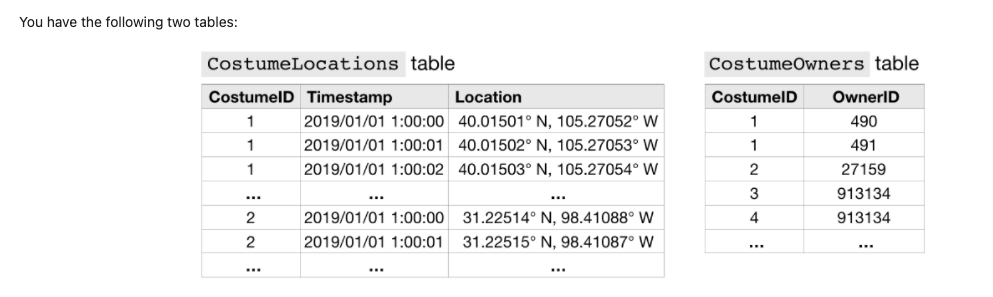

In [ ]:
query_to_optimize = 3

In [ ]:
WITH CurrentOwnersCostumes AS
(
SELECT CostumeID 
FROM CostumeOwners 
WHERE OwnerID = MitzieOwnerID
),
OwnersCostumesLocations AS
(
SELECT cc.CostumeID, Timestamp, Location 
FROM CurrentOwnersCostumes cc INNER JOIN CostumeLocations cl
    ON cc.CostumeID = cl.CostumeID
),
LastSeen AS
(
SELECT CostumeID, MAX(Timestamp)
FROM OwnersCostumesLocations
GROUP BY CostumeID
)
SELECT ocl.CostumeID, Location 
FROM OwnersCostumesLocations ocl INNER JOIN LastSeen ls 
    ON ocl.timestamp = ls.timestamp AND ocl.CostumeID = ls.costumeID